# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

#Fixed random seed for reproducibility
random_state = 2

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis=1, inplace=True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
#Knowing indices of min and max values could help choosing samples
print "Indices for min values: \n {0} \n Indices for max values: \n {1}".format(data.idxmin(axis=0), data.idxmax(axis=0))


Indices for min values: 
 Fresh                95
Milk                154
Grocery              75
Frozen              420
Detergents_Paper     75
Delicatessen        109
dtype: int64 
 Indices for max values: 
 Fresh               181
Milk                 86
Grocery              85
Frozen              325
Detergents_Paper     85
Delicatessen        183
dtype: int64


**Answer** I could select samples 75 and 85 as they represent min and max of two classes but these are the same classes, indicating that these two samples, although vary signifficantly, have strong correlation. So my choices are one which is the min for  Grocery and Detergents_Paper classes(75), other which is the max for Fresh Class (181) and a third which performs near average on all classes (100). 

In [4]:
# Chosen samples
indices = [75, 181, 100]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns=data.keys()).reset_index(drop=True)
print "Chosen samples of wholesale customers dataset:"
display(samples)
#display(samples - np.round(data.mean()))
#display(samples - np.round(data.median()))

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,20398,1137,3,4407,3,975
1,112151,29627,18148,16745,4948,8550
2,11594,7779,12144,3252,8035,3029


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:** The first sample could represent a small fruit store, as although the total sales aren't high, the main products are fresh and frozen. The second one could be a big supermarket as it has big selling throughput, with above average results on all categories and performing above average plus two deviation on Fresh, Milk, Frozen and Delicatessen. The third one could be a regular supermarket as it performs around average on almost all categories

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [5]:

from sklearn.model_selection import  train_test_split
from sklearn import tree

drop_list = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

for drop_element in drop_list:
    reduced_data = pd.DataFrame(data)
    new_data = pd.DataFrame(reduced_data[drop_element])
    reduced_data.drop(drop_element, axis=1, inplace=True)
      
    X_train, X_test, y_train, y_test =  train_test_split(reduced_data, new_data, test_size=0.25, random_state=random_state)
    
    regressor = tree.DecisionTreeRegressor(random_state=random_state)
    regressor.fit(X_train, y_train)

    # Determine the R^2 coefficient
    score = regressor.score(X_test, y_test)
    print "R^2 coefficient removing {0}: {1}".format(drop_element, score)

R^2 coefficient removing Fresh: -0.500889898435
R^2 coefficient removing Milk: -0.152331262727
R^2 coefficient removing Grocery: 0.514349780217
R^2 coefficient removing Frozen: -5.12627908664
R^2 coefficient removing Detergents_Paper: 0.5370246003
R^2 coefficient removing Delicatessen: -2.18131176357


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:** By trying to drop each feature separately, Detergents_Paper results on the highest R^2 score, 0.5370, followed by Grocery with 0.5143, indicating that the other features are capable of predicting these with average accuracy. Hence, these features are not vita lfor identifying customers' spending habits. 

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

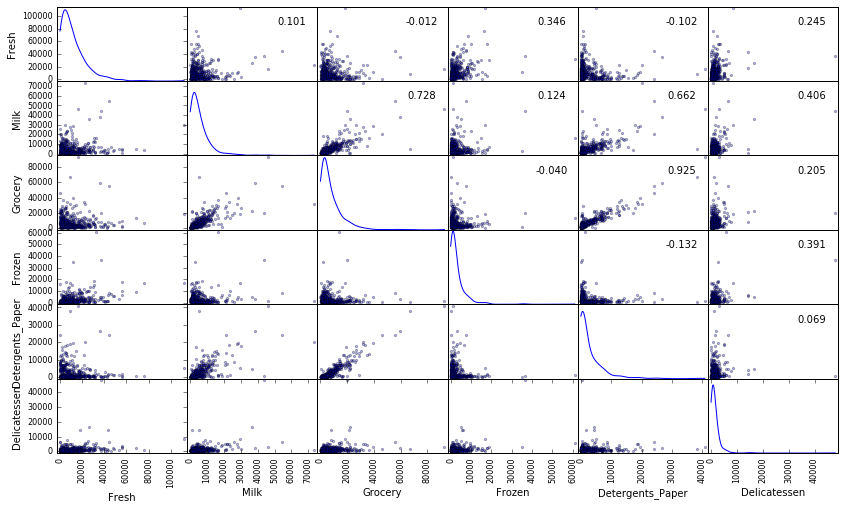

In [6]:
axes = pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde')
corr = data.corr().as_matrix()
for i, j in zip(*np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:** Grocery and Detergents_Paper are visibly correlatted as well as milk and grocery. This confirms the suspicions about the relevance of Grocery, because it is strongly correlated to Detergents_Paper, which means the second may explain the first. The data is not normally distributed, as it is skewed right, which means that its mean is greater than its median. In other words, the majority of data points is smaller than the mean of the distribution, which can be indicative of outliers influence.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

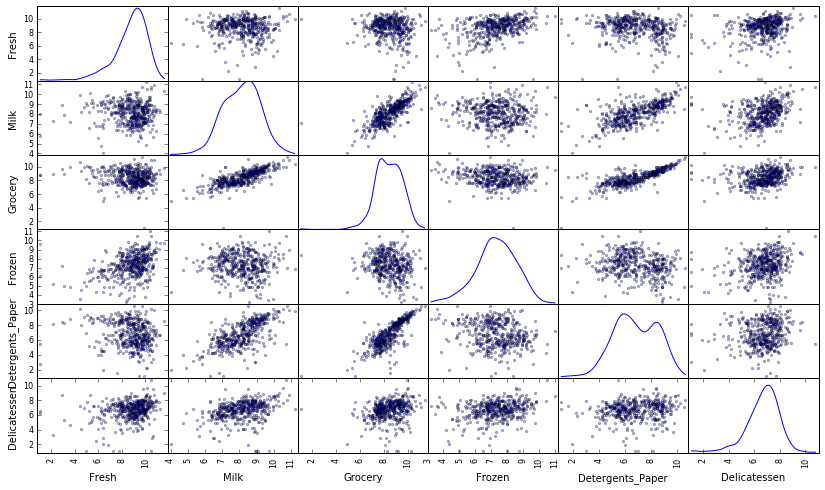

In [7]:
log_data = np.log(data)

log_samples = np.log(samples)

pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [8]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
1,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
2,9.358243,8.959183,9.404590,8.087025,8.991562,8.015988


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [9]:
# For each feature find the data points with extreme high or low values
outliers = np.array([])
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    IQR = Q3 - Q1
    step = 1.5 * (IQR)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    out_IQR = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index

    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers = np.append(outliers, out_IQR)
    # OPTIONAL: Select the indices for data points you wish to remove
from collections import Counter
print "Most common outliers:{0}".format(Counter(outliers).most_common(10))
outliers  = []
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)


Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Most common outliers:[(154.0, 3), (128.0, 2), (65.0, 2), (66.0, 2), (75.0, 2), (193.0, 1), (264.0, 1), (137.0, 1), (142.0, 1), (145.0, 1)]


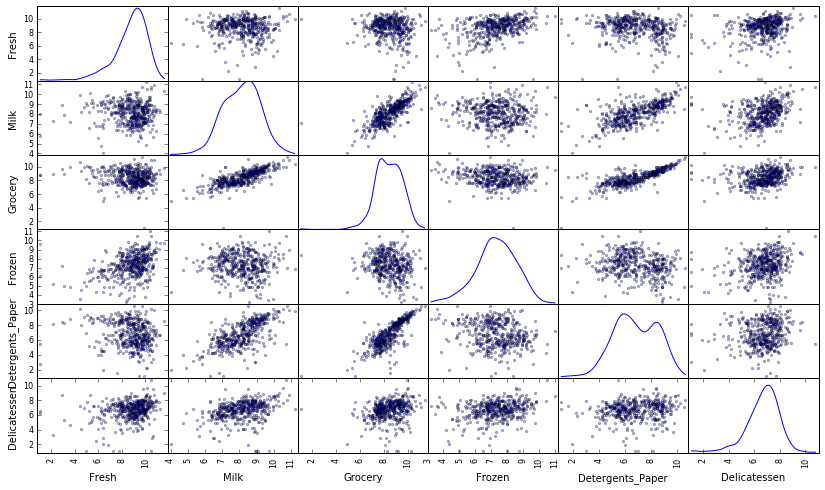

In [10]:
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:** Distribution for Fresh feature is now highle negative skewed, which indicates that there are small outliers in this feature. Analysing the outliers, it is clear that point 154 is an outlier for three classes, while 128, 65, 66 and 75 are outliers for two classes. No data point was removed as there is no occurence so out of range which could indicate an entry error or some other problem with the data itself.


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Explained Variance Ratio per component:[ 0.44237417  0.27657107  0.11617342  0.09617719  0.0457568   0.02294735]


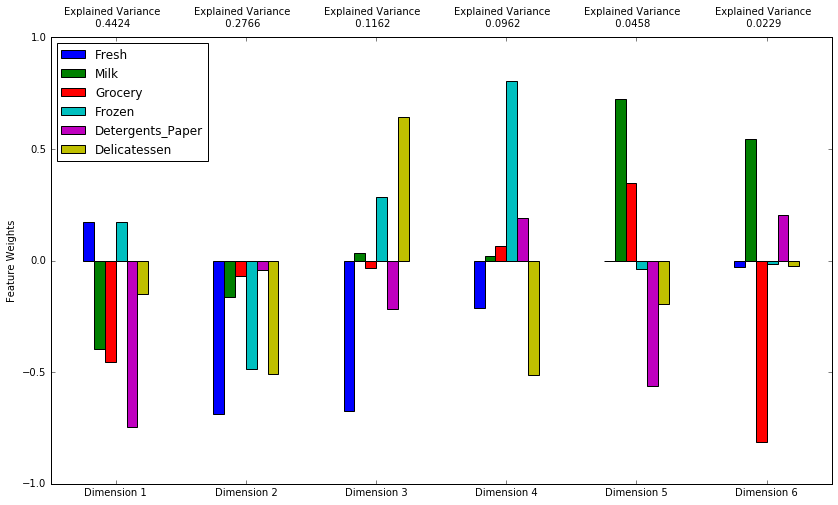

In [11]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6, random_state=random_state).fit(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

print "Explained Variance Ratio per component:{0}".format(pca.explained_variance_ratio_)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:** In total, the first and second principal components explain 71.9% of the variance in the data. In addition, the first four principal components explain 93.14% of the variance. The first dimension explains really well with negative weight Grocery, Detergents_Paper and Milk and has significative results with the other features, while the second explains well with negative weights Fresh, Frozen and Delicatessen and has modest results with Milk. The third dimension has good relation with Fresh (negative weight) and Delicatessen (positive weight), as well as explaining Frozen and Detergents_Paper. Additionally, the fourth dimension explains well with positive weights the Frozen class and with negative ones the Delicatessen.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [12]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,8.3665,-0.5353,1.0888,-1.0634,-0.2159,4.1768
1,-2.1974,-4.9048,-0.0686,0.5623,0.5195,0.2369
2,-2.3702,-1.7971,0.1871,0.3020,-0.5955,0.0546


**Answer** The first sample (0) had the minimum value for Grocery and Detergent_Papers, which are negatively related to Dimension 1, justifying a high value after the transformation. Sample 1 indicates the maximum occurrence for Fresh class, which is related to dimensions 1 and 2 having a negative value, as both have negative weights for this feature. 

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [13]:
pca = PCA(n_components=2, random_state=random_state)

reduced_data = pca.fit_transform(good_data)

pca_samples = pca.transform(log_samples)

reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [14]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,8.3665,-0.5353
1,-2.1974,-4.9048
2,-2.3702,-1.7971


**Answer** Sample 1 represented the minimum value for classes  Grocery and Detergent, which are negatively related to dimension , justifying its high value. On the other hand, Sample 2 was a maximum for Fresh, which is negatively related specially to Dimension 2, justifying the -4.9 value. Additionally, sample 3 was an average one, which makes sense to the average values for both dimensions.

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

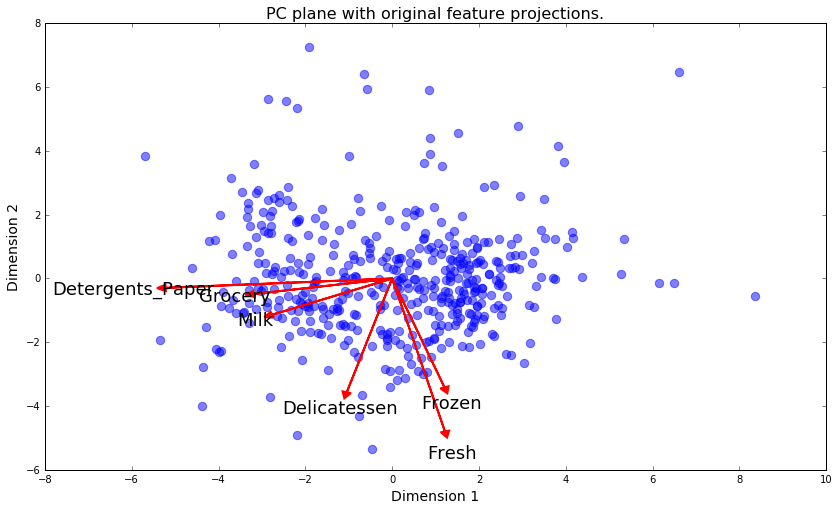

In [15]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

**Answer: **From the biplot, Detergent_Paper, Grocery are almost only related with the first dimension, while Milk is mostly related to this dimension but has significant influence from the other one. The second component is highly associated with Frozen, Fresh and Delicatesse, even though these classes show relation with Dimension 1 as well. These observations agree with the pca_results plot obtained earlier as the first dimension is significant to all variables, while the second one has its importance but isn't as significate as the other.

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:** K-Means is a special form of Gaussian Mixture Model, in which cluster's covariance along all dimensions tend to 0[1].

Using K-Means has advantages such as:
    - Minimizes Euclidean distance;
    - Simple implementation;
    - Each point is assigned to only one class;
    - Works well with data which can be fitted on spherical clusters;
    - Faster and more scalable.
Using GMM has the following advantages:
    - Probabilistic point assigning;
    - More flexible as it has unconstrained variance, resulting on the possibility of having clusters with different shapes.
    - Provides more information such as the probabilities associated to each decision.
   
    
Considering the observations made until now, I will use GMM to have better chance of successfully clustering the data, without assuming spherical clusters.
    
[1] https://www.quora.com/What-are-the-advantages-to-using-a-Gaussian-Mixture-Model-clustering-algorithm

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [16]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
# TODO: Apply your clustering algorithm of choice to the reduced data 
n_clusters_list = np.arange(2,21)
print "Testing KMeans"
for n_clusters in n_clusters_list:

    clusterer = KMeans(n_clusters=n_clusters, random_state=random_state)

    # TODO: Predict the cluster for each data point
    preds = clusterer.fit_predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print "Silhouette score of:{0} for {1} clusters".format(score, n_clusters)
print "Testing GMM"
for n_clusters in n_clusters_list:

    clusterer = GaussianMixture(n_components=n_clusters, random_state=random_state)

    # TODO: Predict the cluster for each data point
    clusterer.fit(reduced_data)
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    print "Silhouette score of:{0} for {1} clusters".format(score, n_clusters)

Testing KMeans
Silhouette score of:0.419166083203 for 2 clusters
Silhouette score of:0.393473191482 for 3 clusters
Silhouette score of:0.330208290907 for 4 clusters
Silhouette score of:0.35082887649 for 5 clusters
Silhouette score of:0.359128046174 for 6 clusters
Silhouette score of:0.364832512065 for 7 clusters
Silhouette score of:0.359350751402 for 8 clusters
Silhouette score of:0.354648327321 for 9 clusters
Silhouette score of:0.346608184213 for 10 clusters
Silhouette score of:0.347621788582 for 11 clusters
Silhouette score of:0.356698914872 for 12 clusters
Silhouette score of:0.35505255044 for 13 clusters
Silhouette score of:0.353381177488 for 14 clusters
Silhouette score of:0.365226198702 for 15 clusters
Silhouette score of:0.352067969902 for 16 clusters
Silhouette score of:0.354094694136 for 17 clusters
Silhouette score of:0.349347004669 for 18 clusters
Silhouette score of:0.346963526353 for 19 clusters
Silhouette score of:0.329827054897 for 20 clusters
Testing GMM
Silhouette sco

### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:** The best silhouette score, 0.4191, is obtained using KMeans with only two clusters.

In [17]:
#Recalculate for the chosen number of clusters
clusterer = KMeans(n_clusters=2, random_state=random_state)

preds = clusterer.fit_predict(reduced_data)

centers = clusterer.cluster_centers_

sample_preds = clusterer.predict(pca_samples)

score = silhouette_score(reduced_data, preds)


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

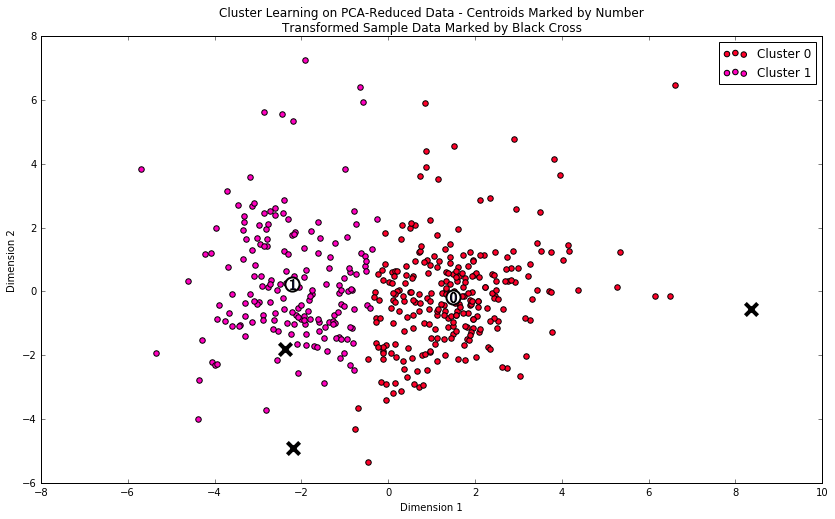

In [18]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8994.0,1909.0,2366.0,2081.0,290.0,681.0
Segment 1,3570.0,7749.0,12463.0,900.0,4567.0,966.0
50%,8504.0,3627.0,4755.5,1526.0,816.5,965.5


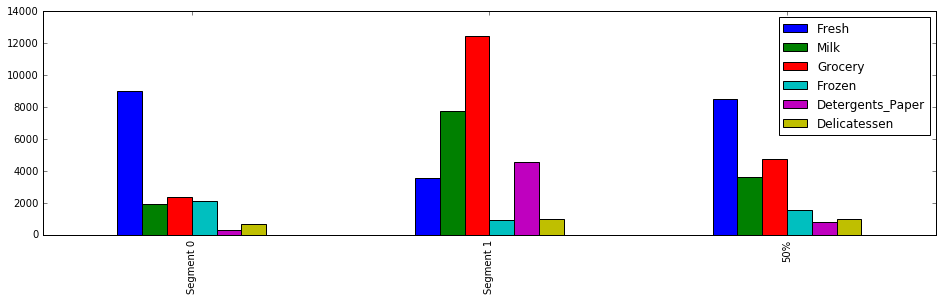

In [19]:
log_centers = pca.inverse_transform(centers)

true_centers = np.exp(log_centers)

segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
true_centers = true_centers.append(data.describe().ix['50%'])
true_centers.plot(kind = 'bar', figsize = (16, 4))

display(true_centers)

### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:** Segment 0 sells mostly Fresh(8994, while the mean is 12000) and Frozen (2081 while the mean is 3071) food, indicating this could be some sort of restaurant. On the other hand, Segment 1 sells almost 50% above mean of Grocery and Milk, almost two times the mean value for Detergents_Paper and a small amount of Fresh and Frozen food, indicating this could be some sort of home supplies store. Furthermore, the visualization of the CLuster Learning on Pca-Reduced Data illustrates the huge difference in variance for dimension 1 and 2, as the boundary line is almost exclusively related to the first one.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [20]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    print 'The distance between sample point {} and center of cluster {}:'.format(i, pred)
    print (samples.iloc[i] - true_centers.iloc[pred])

Sample point 0 predicted to be in Cluster 0
The distance between sample point 0 and center of cluster 0:
Fresh               11404.0
Milk                 -772.0
Grocery             -2363.0
Frozen               2326.0
Detergents_Paper     -287.0
Delicatessen          294.0
dtype: float64
Sample point 1 predicted to be in Cluster 1
The distance between sample point 1 and center of cluster 1:
Fresh               108581.0
Milk                 21878.0
Grocery               5685.0
Frozen               15845.0
Detergents_Paper       381.0
Delicatessen          7584.0
dtype: float64
Sample point 2 predicted to be in Cluster 1
The distance between sample point 2 and center of cluster 1:
Fresh               8024.0
Milk                  30.0
Grocery             -319.0
Frozen              2352.0
Detergents_Paper    3468.0
Delicatessen        2063.0
dtype: float64


**Answer:** Sample point 0 had the minimum values for classes Grocery and Detergents_Paper and is clustered in Cluster 0, which makes sense, as it could in fact be a restaurant. Sample point 1 had the maximum value for Fresh category and was predicted in Cluster 1, along with sample 2 which had average values for all classes. These predictions are consistent with the cluster representing some sort of home supply store, as these tend to sell all kinds of products. 

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:** The wholesale distributor can use the customer segments to determine which customers would react positively to the change in delivery scheme by assuming that, although each client may be affected in a specific way, customers from same segments tend to be affected in a similar manner, as their business characteristics are similar.  Using this, the A/B test may be conducted on a small portion of each segment, as the results should predict well the complete result.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:** The wholesale distributor can label new customers by using the inverse log and pca transformations with the corresponding labels obtained using the clustering method to train a supervised learner, such as SVM. This supervised learner would then predict the segment based on the given estimates, as the segment is the label used to train the classifier. 

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

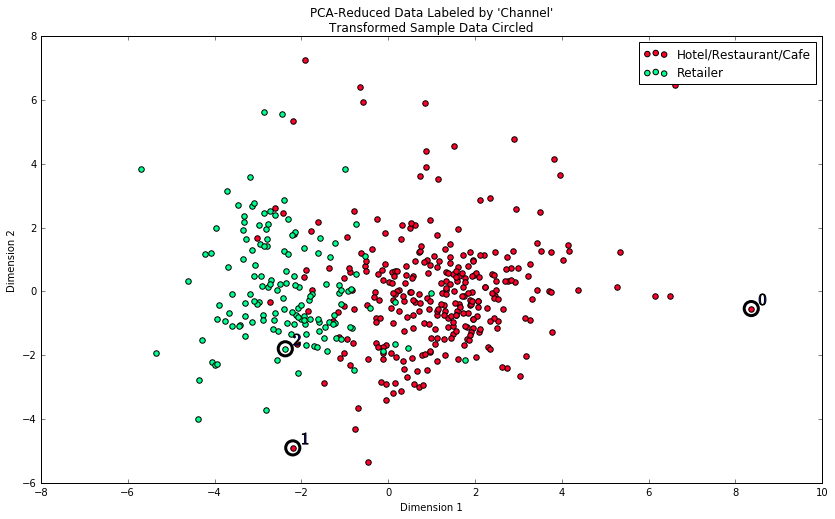

In [21]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:** The clustering algorithm and number of clusters visually represent well the underlying distribution, only having performance issues due to its hard boundary, while the distributions have some mixed regions. In other words, the majority of data, which is distant from the separation boundary is well classified but some points near the boundary are misclassified as this boundary line is hard.  Comparing to my previous definitions of the customer segments, these classifications are consistent, as the idea is quite similar, diverging only on the specific names. As for the three samples, the first one was guessed as a small fruit store and is in the Hotel/Restaurant/Cafe, so its not so different. As for the second, it was considered as a supermarket but is in fact in the HoReCa category. Finally, the third sample was predicted as a regular supermarket and is in fact classified as retailer, which makes sense. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.